# Welcome to the Dark Art of Coding:
## Introduction to Python
graphing with matplotlib

<img src='../images/dark_art_logo.600px.png' width='300' style="float:right">

# Prerequisites:

* pandas
* matplotlib
* numpy

IF you don't already have these installed in your virtual environment, **activate your virtualenv** and **conda install** them:

```bash
conda install pandas numpy matplotlib
```

In [1]:
# generate a horizontal bar chart
# (based on an example from the matplotlib website...)
# http://matplotlib.org/1.2.1/examples/pylab_examples/barh_demo.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# we'll use pandas to read in some data, but we'll only keep two of the columns

df = pd.read_csv('log_file.csv', names=['name',
                                                  'email',
                                                  'fmip',
                                                  'toip',
                                                  'date',
                                                  'lat',
                                                  'long',
                                                  'payload'],
                                            usecols=['name'])

In [3]:
# to generate this graph, we are gonna make up
# a set of random numbers between 
# 42 and 48.5

In [4]:
# NOTE:
#     0) the function len(df) returns the number of rows in df
#     1) np.random.rand yields numbers between [0 and 1].
#

df['fan_rating'] = 42 + 6.5 * np.random.rand(len(df))

In [5]:
df

,name,fan_rating
0,barry allen,44.915260
1,barbara gordon,45.471604
2,kyle rayner,47.674126
3,dinah lance,43.328988
4,arthur curry,45.240782
5,kara zor-el,46.100264
6,kara zor-el,47.653468
7,hal jordan,42.591902
8,kara zor-el,45.266152
9,john constantine,47.783772


In [6]:
# as a first step, let's clean up the data by dropping
# duplicate rows using these rules/parameters:
#     0) check whether there is a duplicate in a given column
#     1) keep only the last value of any duplicates
#        (default is to take the first)
#     2) replace the dataframe with our new deduplicated version

In [7]:
df.drop_duplicates(subset='name', inplace=True, keep='last')


In [8]:
df

,name,fan_rating
0,barry allen,44.915260
1,barbara gordon,45.471604
2,kyle rayner,47.674126
3,dinah lance,43.328988
4,arthur curry,45.240782
7,hal jordan,42.591902
8,kara zor-el,45.266152
9,john constantine,47.783772


In [9]:
# let's convert the content of the name column from
# first & last to just first name
# we do this by generating a function to do 
# the conversion on a single value

In [22]:
def fname_only(full_name):
    # change
    fname = full_name.split(' ')[0]
    return fname

In [11]:
# the map() function associated with dataframe columns maps
# the named function against
# every item in every row of the given column
# NOTE:
#     Remember, pandas has several ways to refer to columns:
#     0) when creating a new column, you must use bracket
#        syntax: df['<colname>']
#     1) to refer to an existing column, you are free to use either
#        bracket syntax OR dot notation syntax: df.<colname>
#        I find the dot notation easier to type, so defer
#        to it when possible

In [12]:
df['fname'] = df.name.map(fname_only)

In [13]:
df

,name,fan_rating,fname
0,barry allen,44.915260,barry
1,barbara gordon,45.471604,barbara
2,kyle rayner,47.674126,kyle
3,dinah lance,43.328988,dinah
4,arthur curry,45.240782,arthur
7,hal jordan,42.591902,hal
8,kara zor-el,45.266152,kara
9,john constantine,47.783772,john


In [14]:
# lastly, let's extract just the values out of
#     the fname column.
# this is a list-like object and will be used 
#     as the names for our horizontal bars later.

In [15]:
people = df.fname.values

In [16]:
type(people)

numpy.ndarray

In [17]:
people

array(['barry', 'barbara', 'kyle', 'dinah', 'arthur', 'hal', 'kara',
       'john'], dtype=object)

In [18]:
# now we can put together a sequence that will
# store the y position values. we'll use np.arange to
# create an array of sequential values based on
# the length of the people array
# this will be used as a set of temporary names
# for our horizontal bars...
# ultimately, we will replace it with real names...

# plus, we will save off the fan rating as a series for use
# in the plotting software as the x values

In [19]:
y_pos = np.arange(len(people))

performance = df['fan_rating']

In [20]:
# based on this preliminary work, we can generate a
# simple horizontal bar chart
# we give it y values and x values
# and we tell it to show() the plot

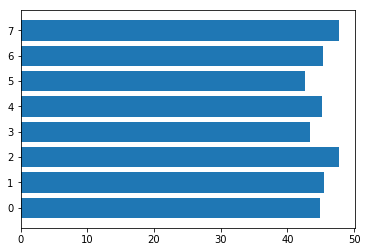

In [21]:
plt.barh(y_pos, performance)
plt.show()

In [23]:
# presume we don't like the alignment of the names
# against the horizontal bars.
# we can align the names to the center of the bars.

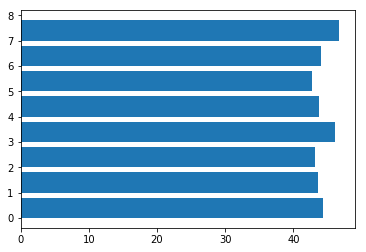

In [24]:
plt.barh(y_pos, performance, align='edge')
plt.show()

In [25]:
# what if we don't like the dark color? we can revise the color to have a
# greater degree of transparency by setting the alpha characteristic

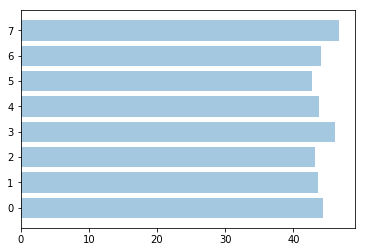

In [26]:
plt.barh(y_pos, performance, alpha=0.4)
plt.show()

In [27]:
# what if we don't like the default color? 
# we can revise the color as desired
# matplotlib has a number of default colors:
#     'r' stands for red

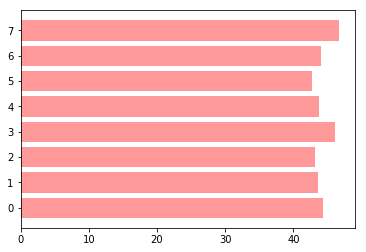

In [28]:
plt.barh(y_pos, performance, align='center', alpha=0.4, color='r')
plt.show()

In [29]:
# what if our data comes with some percentage of error?
# this can be represented using an xerr parameter.
# here, we again use random to generate a random 
# set of values that we can
# then use to generate error bars. 
# in real life, you would have some
# margin for error for all the values.

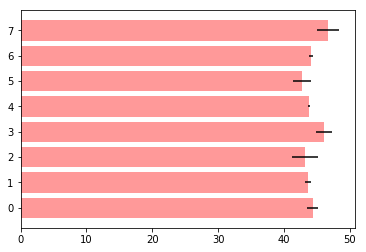

In [30]:
error = 2 * np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, 
        align='center', alpha=0.4, color='r')
plt.show()

In [31]:
# this still leaves off info that most of us
# would want, in terms of the
# people names, title, axis labels, etc.

In [32]:
plt.barh(y_pos, performance, xerr=error, 
         align='center', alpha=0.4, color='r')

plt.yticks(y_pos, people)
plt.xlabel('rating')
plt.title("Estimated Justice League's Fan Ratings")


Text(0.5,1,"Estimated Justice League's Fan Ratings")

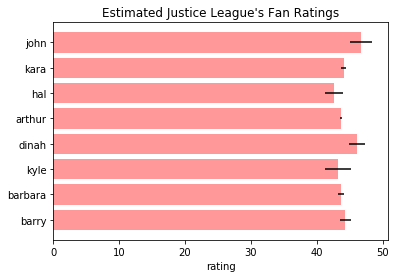

In [33]:
plt.savefig('hbar.png')
plt.show()

In [34]:
# creating a histogram with some additional features
# (based heavily on an example from the matplotlib website...)
# http://matplotlib.org/1.2.1/examples/api/histogram_demo.html

# In addition to the basic histogram, this demo shows a few optional
# features:
#     * setting the number of data bins
#     * the ''normed'' flag, which normalizes bin heights so that the
#       integral of the histogram is 1. the resulting histogram is a
#       probability density
#     * setting the face color of the bars
#     * setting the opacity (alpha value)

# As always, we start by importing the appropriate libraries

In [35]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [36]:
# we define some of the characteristics of our distribution:
mu = 100       # mean of the distribution
sigma = 15     # standard deviation of the distribution

In [37]:
# np.random.randn creates a random array of values taken from a
# standard normal distribution
# we can transform the distribution by multiplying the values by sigma and
# by adding the mean mu

In [38]:
x = mu + sigma * np.random.randn(10000)
print(x)

[ 91.14942228  93.50915927  97.89495852 ...  67.86050994  86.30197155
 112.95877103]


In [39]:
# we set a specific number of bins that we will group our values into...

In [40]:
num_bins = 50

In [41]:
# next we create the data for the histogram
# n = values (height) for each bar of the histogram
# bins = the indicators that demarck the bins
# patches = are the rectangle objects that represent each bar

[4.48072649e-05 0.00000000e+00 4.48072649e-05 8.96145299e-05
 8.96145299e-05 1.79229060e-04 4.92879914e-04 4.03265385e-04
 9.40952564e-04 1.16498889e-03 1.83709786e-03 1.65786880e-03
 3.22612308e-03 3.53977393e-03 4.88399188e-03 6.98993333e-03
 8.37895855e-03 1.12914308e-02 1.35766013e-02 1.64442662e-02
 1.72059897e-02 1.97151966e-02 2.20451744e-02 2.29861269e-02
 2.48680320e-02 2.47336103e-02 2.69291662e-02 2.49576466e-02
 2.48232248e-02 2.53161047e-02 2.28965124e-02 2.02080765e-02
 1.87294367e-02 1.55033137e-02 1.31733359e-02 1.18291179e-02
 9.14068205e-03 6.36263162e-03 5.86975171e-03 4.83918461e-03
 2.68843590e-03 2.10594145e-03 2.28517051e-03 1.52344701e-03
 8.06530769e-04 5.82494444e-04 1.79229060e-04 1.79229060e-04
 1.79229060e-04 1.34421795e-04]
[ 40.61913425  42.85091519  45.08269614  47.31447708  49.54625802
  51.77803896  54.00981991  56.24160085  58.47338179  60.70516273
  62.93694368  65.16872462  67.40050556  69.6322865   71.86406745
  74.09584839  76.32762933  78.5594102

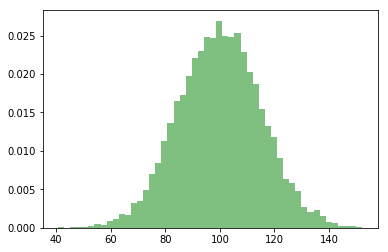

In [42]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='green', alpha=0.5)
print(n)
print(bins)
# print(patches)
# for item in patches:
#     print(item)

plt.show()

In [43]:
# from here, we can add a 'best fit' line...
# the normal probability density function (pdf) helps to answer the question:
# "how common are samples at a given value?'

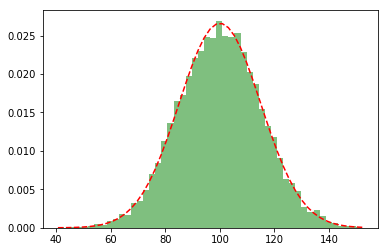

In [44]:
n, bins, patches = plt.hist(x, num_bins,
                            normed=1, 
                            facecolor='green',
                            alpha=0.5)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')

plt.show()

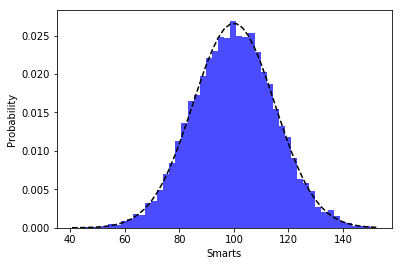

In [45]:
# And let's add some labels...

n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='blue', alpha=0.7)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'k--')

plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.show()

In [46]:
# the opening '$\' and the closing '$' tags in the following commands enable you to
# include italics in the title

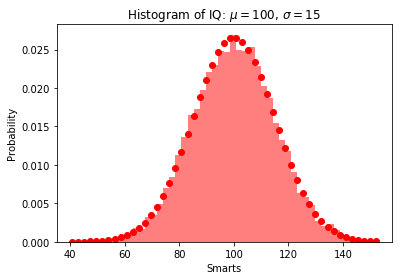

In [47]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='red', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'ro')
plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

plt.show()

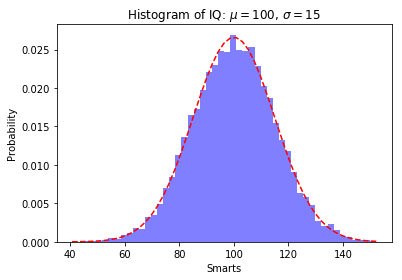

In [48]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

plt.show()

plt.savefig('hist.png')

In [49]:
# generate a scatter plot
# (based heavily on an example from the matplotlib website...)
# http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# Let's read in a csv via pandas but keep only two of the columns

In [52]:
df = pd.read_csv('log_file_1000.csv', names=['name',
                                                   'email',
                                                   'fmip',
                                                   'toip',
                                                   'date',
                                                   'lat',
                                                   'long',
                                                   'payload'],
                                            nrows=35,
                                            usecols=['lat', 'long'])

In [53]:
# next, let's create two arrays from the lat and long columns

In [54]:
df

,lat,long
0,49.83160,8.01485
1,45.10327,11.68293
2,47.11673,10.35874
3,46.75616,11.47886
4,48.59134,12.30683
5,45.23082,10.90642
6,48.20129,10.54183
7,48.85730,9.23887
8,48.05990,9.97774
9,46.43865,8.50877


In [55]:
latitudes = df.lat
longitudes = df.long

In [56]:
# here we calculate the length of one of the arrays

count = len(latitudes)

In [57]:
# we'll use numpy to create a random collections of numbers for use in defining colors
# of the circles in our scatterplot

In [58]:
colors = np.random.rand(count)

In [59]:
# this step creates a random set of areas based on a radiuses from 0 to 20
# we can imagine that this is indicative of a the frequency of communications OR
# something similarly awesome and nerdy like that.
# np.pi gives us pi to 15 decimal places
# np.random.rand gives us random numbers from 0 to 1

In [60]:
areas = np.pi * (20 * np.random.rand(count))**2

In [61]:
# generate the scatter plot

In [62]:
plt.scatter(latitudes, longitudes, s=areas, c=colors) #, alpha=0.4)

In [63]:
# we chose to create stand alone variables (latitude, longitude) but these are not
# required... we can just as happily read in directly from df.lat or df.long:
# plt.scatter(df.lat, df.long, s=area, c=colors, alpha=0.4)

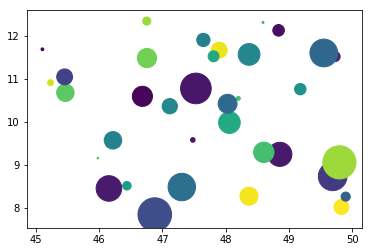

In [64]:
plt.savefig('scatter.png')
plt.show()

In [65]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or file-like object
    A string containing a path to a filename, or a Python
    file-like object, or possibly some backend-dependent object
    such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is *None* and *fname* is a string, the output
    format is deduced from the extension of the filename. If
    the filename has no extension, the value of the rc parameter
    ``savefig.format`` is used.

    If *fname* is not a string, remember to specify *format* to
    ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar >

In [66]:
# generate multiple subplots on the same figure
# (based heavily on an example from the matplotlib website...)
# http://matplotlib.org/1.2.1/examples/pylab_examples/multiple_figs_demo.html
# we start by importing needed libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# numpy's linspace() function will generate evenly spaced numbers over an interval...
# it returns 50 numbers (num=50) by default

In [69]:
x1 = np.linspace(0.0, 5.0, num=200)
x2 = np.linspace(0.0, 5.0, num=200)

In [70]:
# NOTE: in a case where we need to set multiple names for essentially the same value(s)
# this syntax works:
# I am hesitant to use it for anything important...because I tend to miss the second
# variable when I quickly scan down my code
# x1 = x2 = np.linspace(0.0, 5.0, num=200)

In [71]:
# np.cos() calculates the cosine of each element in a passed array
# np.pi produces a static value for pi out to 15 decimal places.
# np.exp() calculates the natural exponential function (e^x) for each
#     element in a passed array, where e = 2.71828. This function acts as a dampener
#     in the following equation. As the value of (-x1) decreases (from
#     0 to -5), the value of np.exp gets closer and closer to zero.

In [72]:
y1 = np.cos(2 * np.pi/2.0 * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi/2.0 * x1)

In [73]:
# plt.interactive() sets the plot so that you can manipulate it incrementally in real-time

In [74]:
# this next command creates a subplot with a matrix of rows and columns 
# that has the following characteristics:
#     plt.subplot(nrows=2, ncols=1, plot_number=1)
# where nrows and ncols ID the number of rows/columns respectively
# where plot_number is the currently active (writeable) plot in the matrix

In [75]:
plt.subplot(2, 1, 1)

In [76]:
# we next write to the currently active plot based on these characteristics:
# plt.plot(x-axis values, y-axis values, formatting for the line)
# in this case, we use:
#     x1 values along the x-axis
#     y1 values along the y-axis
#     'y' = yellow
#     'o' yields circle marks
#     '-' (dash) yields a solid line
#     AND
#     'r' = red
#     '.' = small dots
#     '-' (dash) again yields a solid line 

In [77]:
plt.plot(x1, y1, 'yo-')
plt.plot(x2, y2, 'r.-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped & undamped oscillations')

Text(0,0.5,'Damped & undamped oscillations')

In [78]:
# next we set the second subplot as the active one and
# we define a green line with green marker dots.

In [79]:
plt.subplot(2, 1, 2)
plt.plot(x1, y1, 'g^-')
plt.xlabel('time (s)')
plt.ylabel('Damped')

Text(0,0.5,'Damped')

In [80]:
# NOTE: when you have plt.interactive() set to True:
# it is possible to not only set values, but change values...

In [81]:
plt.xticks(np.arange(5), ['zero', 'one', 'two', 'three', 'four'])



([<matplotlib.axis.XTick at 0x10f04fb00>,
 <a list of 5 Text xticklabel objects>)

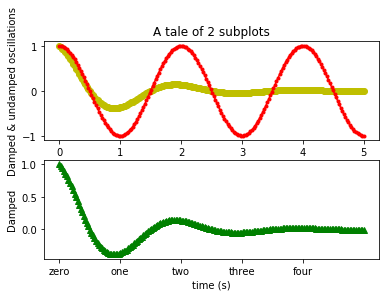

In [82]:
plt.show()
plt.savefig('subplots.png')